In [1]:
  #!/usr/bin/env python

try:
    import gi
    gi.require_version('NumCosmo', '1.0')
    gi.require_version('NumCosmoMath', '1.0')
except:
    pass

import math
import matplotlib.pyplot as plt
from gi.repository import GObject
from gi.repository import NumCosmo as nc
from gi.repository import NumCosmoMath as ncm
import numpy as np
import sys
sys.path.insert(0,'../../scripts')

from scipy.stats import chi2
import corner

import pyccl as ccl
from nc_ccl import create_nc_obj, ccl_cosmo_set_high_prec

ncm.cfg_init()
ncm.cfg_set_log_handler (lambda msg: sys.stdout.write (msg) and sys.stdout.flush ())

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
s1d1 = chi2.cdf (1.0, df = 1)
s1d2 = chi2.cdf (4.0, df = 1)
s2d1 = chi2.cdf (1.0, df = 1)
s2d2 = chi2.cdf (4.0, df = 1)
s2d3 = chi2.cdf (9.0, df = 1)
qts = [0.5 - s1d2 / 2.0, 0.5 - s1d1 / 2.0, 0.5, 0.5 + s1d1 / 2.0, 0.5 + s1d2 / 2.0]

In [3]:
nwalkers = 300
burnin   = 80

mcat0 = Ncm.MSetCatalog.new_from_file_ro ("ncount_ascaso_mcmc_unbinned.fits", nwalkers * burnin)
mcat1 = Ncm.MSetCatalog.new_from_file_ro ("ncount_ascaso_mcmc_binned.fits",   nwalkers * burnin)

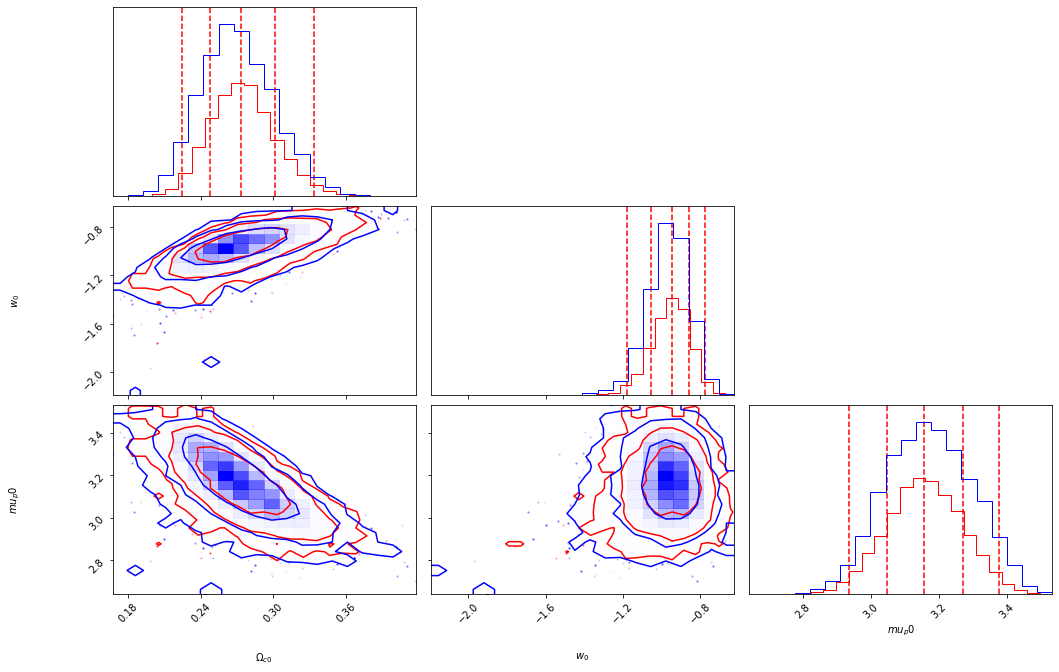

In [4]:
rows0 = np.array ([mcat0.peek_row (i).dup_array () for i in range (0, mcat0.len ())])
params = ["$" + mcat0.col_symb (i) + "$" for i in range (mcat0.ncols ())]
figure = corner.corner (rows0[:,1:], labels = params[1:], reverse = False,
                        quantiles=qts, levels = (s2d1, s2d2, s2d3), color = "red")

rows1 = np.array ([mcat1.peek_row (i).dup_array () for i in range (0, mcat1.len ())])
params = ["$" + mcat1.col_symb (i) + "$" for i in range (mcat1.ncols ())]
figure = corner.corner (rows1[:,1:], labels = params[1:], reverse = False,
                        levels = (s2d1, s2d2, s2d3), color = "blue", fig = figure)

figure.set_size_inches(16, 10)

In [5]:
nwalkers = 300
burnin   = 0

mcat0 = Ncm.MSetCatalog.new_from_file_ro ("ncount_ascaso_mc_unbinned.fits", nwalkers * burnin)
mcat1 = Ncm.MSetCatalog.new_from_file_ro ("ncount_ascaso_mc_binned.fits",   nwalkers * burnin)

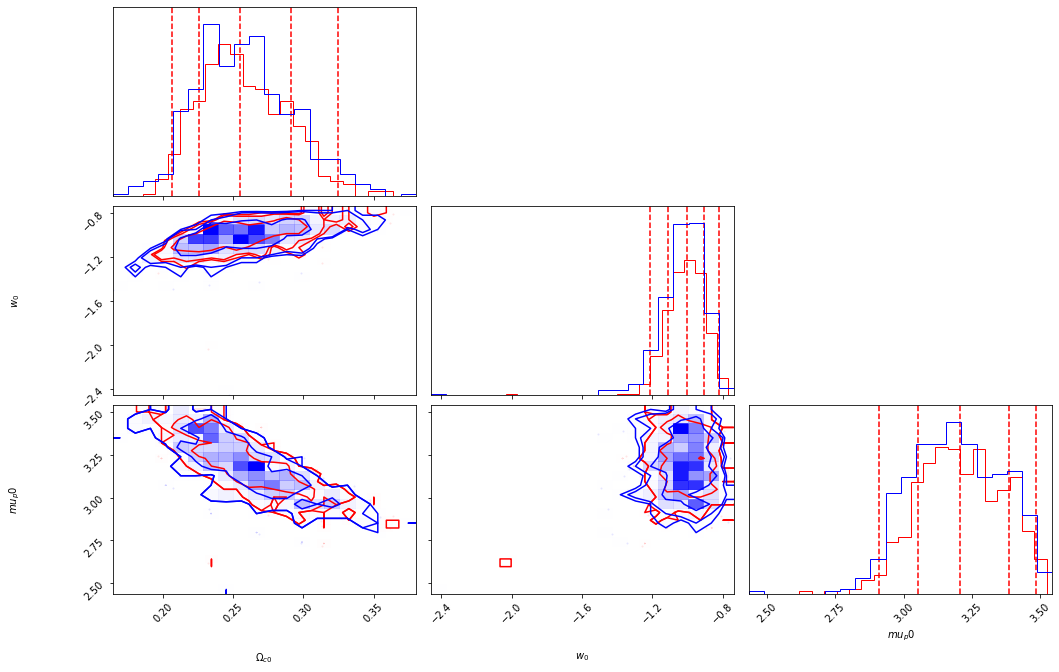

In [6]:
rows0 = np.array ([mcat0.peek_row (i).dup_array () for i in range (0, mcat0.len ())])
params = ["$" + mcat0.col_symb (i) + "$" for i in range (mcat0.ncols ())]
figure = corner.corner (rows0[:,1:], labels = params[1:], reverse = False,
                        quantiles=qts, levels = (s2d1, s2d2, s2d3), color = "red")

rows1 = np.array ([mcat1.peek_row (i).dup_array () for i in range (0, mcat1.len ())])
params = ["$" + mcat1.col_symb (i) + "$" for i in range (mcat1.ncols ())]
figure = corner.corner (rows1[:,1:], labels = params[1:], reverse = False,
                        levels = (s2d1, s2d2, s2d3), color = "blue", fig = figure)

figure.set_size_inches(16, 10)